<a href="https://colab.research.google.com/github/stepanjaburek/quantum_social_science_lr/blob/main/without_operator_21.1.25.stepan_colab_HCPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Social Science: PCA and Cluster Analysis of the Literature

#Setup

In [ ]:
!pip install scikit-learn-extra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from IPython.display import display

In [37]:
from google.colab import drive
drive.mount('/content/drive') # this asks for your google account
# load data from our private google folder shared among us
data = pd.read_excel("/content/drive/MyDrive/QSS_Colab/keyword_data.xlsx")
metadata = pd.read_excel("/content/drive/MyDrive/QSS_Colab/metadata.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data cleaning

In [38]:
# Rename "Broekaert_2018" in metadata
metadata.loc[252, 'file_name'] = "Broekaert_2018_The Tacit 'Quantum' of Meeting the Aesthetic Sign; Contextualize, Entangle,2.pdf"
data.loc[252, 'filename'] = "Broekaert_2018_The Tacit 'Quantum' of Meeting the Aesthetic Sign; Contextualize, Entangle,2.pdf"
# Delete duplicit paper "Yukalov et al. - 2018 - Information processing by networks of quantum deci.pdf"
data = data.drop(1170)
# Delete paper "Yilmaz - 2017 - Quantum cognition models of ethical decision-makin.pdf" that is only present in data
data = data.drop(1166)
# Delete paper "Park_2016_Decision-making &amp quantum mechanical models of cognitive processing.pdf" that is only present in metadata
metadata = metadata.drop(892)

In [ ]:
data

# Keywords

In [104]:
# Exclude authors and create df
df = data.drop(columns=[data.columns[i] for i in [1,2,4,16,30]])

In [105]:
# Exclude social science fields
df = df.drop(columns=df.columns[26:38])

In [106]:
# Exclude "operator", "quantum" and "quantization"
df = df.drop(columns=df.columns[15:19])

In [107]:
# keep only papers with some non-zero values in the final columns we want to keep
df = df[df.iloc[:, 2:23].sum(axis=1) > 0]
df = df.reset_index(drop=True)

In [ ]:
[(i, list(df.keys())[i]) for i in range(len(df.keys()))]

In [ ]:
# Or keeep only the authors
#df = data[data.columns[[1,2,4,16,30]]]

# Numbering the data for centroid extraction

In [111]:
metadata = metadata.reset_index()
metadata = metadata.rename(columns={'index': 'id'})
metadata['id'] = metadata['id'] + 1

df = df.reset_index()
df = df.rename(columns={'index': 'id'})
df['id'] = df['id'] + 1

# Scaling in the rows

In [112]:
# create features for the pca
features = df.drop(['filename', 'id'], axis=1)
feature_names = features.columns

features = features.div(features.sum(axis=1), axis=0) # row normalization as Michael suggested, dividing the values by the sum of their row (paper)
#features = StandardScaler().fit_transform(features.T).T # Z-score standardization on transposed data to work in rows

features = pd.DataFrame(features, columns=feature_names)
features

,born's rule,collapse,commutativity,complementarity,contextuality,eigenvalue,eigenvector,entanglement,exclusion principle,hamiltonian,...,interference,measurement problem,observer effect,dinger equation,superposition,tunneling,uncertainty,uncertainty principle,wave function,wave-particle duality
0,0.0,0.000000,0.028037,0.028037,0.000000,0.140187,0.112150,0.018692,0.0,0.046729,...,0.102804,0.000,0.0,0.028037,0.037383,0.0,0.093458,0.018692,0.000000,0.0
1,0.0,0.070423,0.000000,0.000000,0.000000,0.126761,0.000000,0.014085,0.0,0.507042,...,0.014085,0.000,0.0,0.056338,0.028169,0.0,0.084507,0.028169,0.028169,0.0
2,0.0,0.029851,0.000000,0.000000,0.574627,0.007463,0.000000,0.074627,0.0,0.007463,...,0.149254,0.000,0.0,0.000000,0.029851,0.0,0.014925,0.000000,0.037313,0.0
3,0.0,0.000000,0.000000,0.000000,0.829787,0.000000,0.000000,0.021277,0.0,0.000000,...,0.085106,0.000,0.0,0.000000,0.000000,0.0,0.063830,0.000000,0.000000,0.0
4,0.0,0.075949,0.025316,0.012658,0.253165,0.012658,0.050633,0.000000,0.0,0.037975,...,0.455696,0.000,0.0,0.000000,0.075949,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,0.0,0.000000,0.000000,0.000000,0.000000,0.064516,0.000000,0.935484,0.0,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1146,0.0,0.000000,0.000000,0.000000,0.000000,0.078947,0.000000,0.921053,0.0,0.000000,...,0.000000,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1147,0.0,0.097826,0.000000,0.000000,0.032609,0.000000,0.000000,0.043478,0.0,0.000000,...,0.054348,0.000,0.0,0.000000,0.054348,0.0,0.423913,0.086957,0.206522,0.0
1148,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.0,0.000000,...,0.000000,0.000,0.0,0.000000,0.400000,0.0,0.000000,0.000000,0.000000,0.0


# Scaling in the columns

We are not running this now

In [ ]:
# create features for the pca
features = df.drop(['filename', 'id'], axis=1)
feature_names = features.columns

# scale with either z-score standardization or MinMax normalization
# features = StandardScaler().fit_transform(features) #Z-score
# features = MinMaxScaler().fit_transform(features) # MinMax

#features.iloc[:, 1:23] = (features.iloc[:, 1:23] > 0).astype(int) # binary >0
#features.iloc[:, 1:23] = (features.iloc[:, 1:23] > 4).astype(int) # binary >4

features = pd.DataFrame(features, columns=feature_names)
features

# Data analysis

#PCA

Explained variance ratio: [0.24438299 0.14565089 0.12689342 0.09822172 0.09034138 0.07960134
 0.06648111 0.04768721 0.03518253 0.02000311]


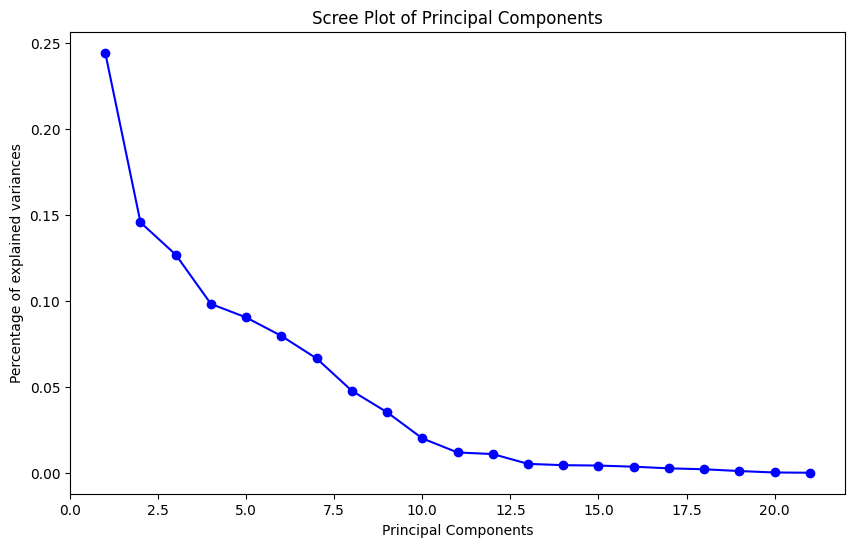

                                 feature    PC   loading
entanglement                entanglement   PC1  0.910609
uncertainty                  uncertainty   PC1 -0.300577
interference                interference   PC1 -0.252963
hilbert space              hilbert space   PC1 -0.075744
hamiltonian                  hamiltonian   PC1 -0.071930
...                                  ...   ...       ...
born's rule                  born's rule  PC21  0.218218
eigenvector                  eigenvector  PC21  0.218218
exclusion principle  exclusion principle  PC21  0.218218
dinger equation          dinger equation  PC21  0.218218
observer effect          observer effect  PC21  0.218218

[105 rows x 3 columns]
                     feature   PC   loading
entanglement    entanglement  PC1  0.910609
hamiltonian      hamiltonian  PC1 -0.071930
hilbert space  hilbert space  PC1 -0.075744
interference    interference  PC1 -0.252963
uncertainty      uncertainty  PC1 -0.300577
uncertainty      uncertainty

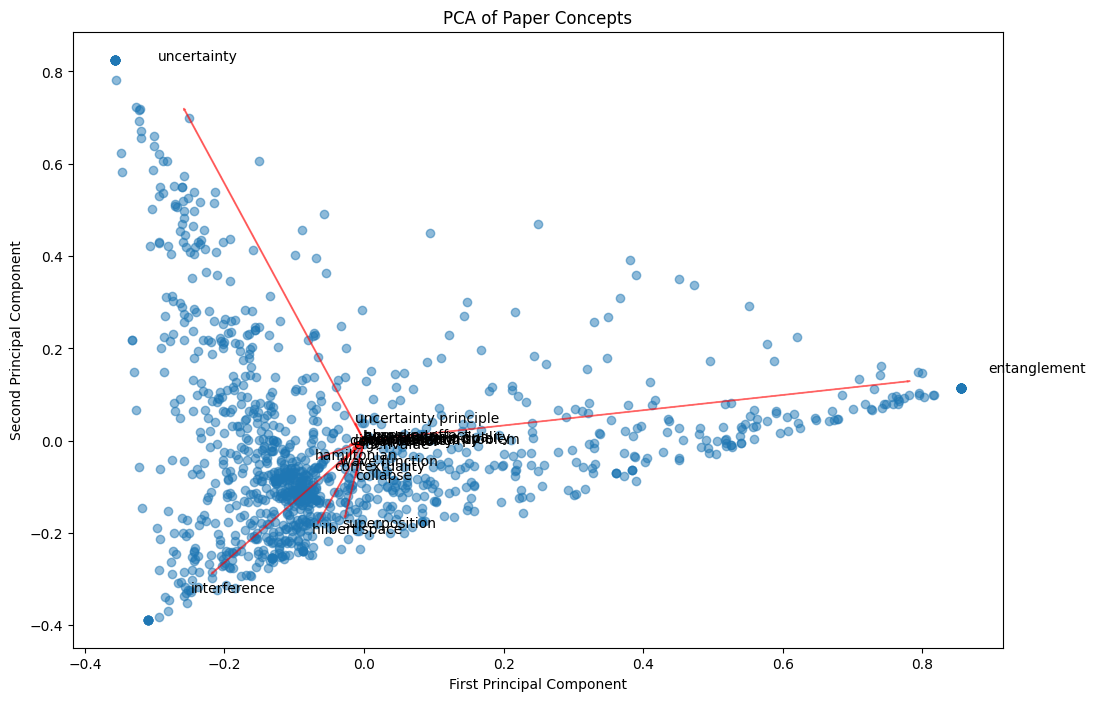

,feature,PC,loading
entanglement,entanglement,PC1,0.910609
hamiltonian,hamiltonian,PC1,-0.071930
hilbert space,hilbert space,PC1,-0.075744
interference,interference,PC1,-0.252963
uncertainty,uncertainty,PC1,-0.300577
uncertainty,uncertainty,PC2,0.867669
entanglement,entanglement,PC2,0.155691
superposition,superposition,PC2,-0.196968
hilbert space,hilbert space,PC2,-0.212579
interference,interference,PC2,-0.345518


In [113]:
pca = PCA()
pca_result = pca.fit_transform(features)
print("Explained variance ratio:", pca.explained_variance_ratio_[:10])

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, 'bo-')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of explained variances')
plt.show()

# Feature importance in components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=features.columns
)

# Top 5 features per component
top_loadings = pd.DataFrame()
for pc in loadings.columns:
    top_5 = pd.DataFrame({
        'feature': loadings.index,
        'PC': pc,
        'loading': loadings[pc]
    })

    top_5 = top_5.reindex(top_5['loading'].abs().sort_values(ascending=False).index)
    top_5 = top_5.head(5)
    top_loadings = pd.concat([top_loadings, top_5])

print(top_loadings)

# PC1 and 2
pc12_loadings = top_loadings[top_loadings['PC'].isin(['PC1', 'PC2', 'PC3', 'PC4'])]
pc12_loadings = pc12_loadings.sort_values(['PC', 'loading'],
                                         ascending=[True, False])
print(pc12_loadings)

# PCA biplot
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

for i, feature in enumerate(features.columns):
    plt.arrow(0, 0,
              pca.components_[0, i]*max(abs(pca_result[:, 0])),
              pca.components_[1, i]*max(abs(pca_result[:, 1])),
              color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*max(abs(pca_result[:, 0]))*1.15,
             pca.components_[1, i]*max(abs(pca_result[:, 1]))*1.15,
             feature)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Paper Concepts')
plt.show()
display(pc12_loadings)

How many PCs do we want? Literature says probably a sum between 80-90% of explained variance

Number of components needed to explain 80% of variance: 7


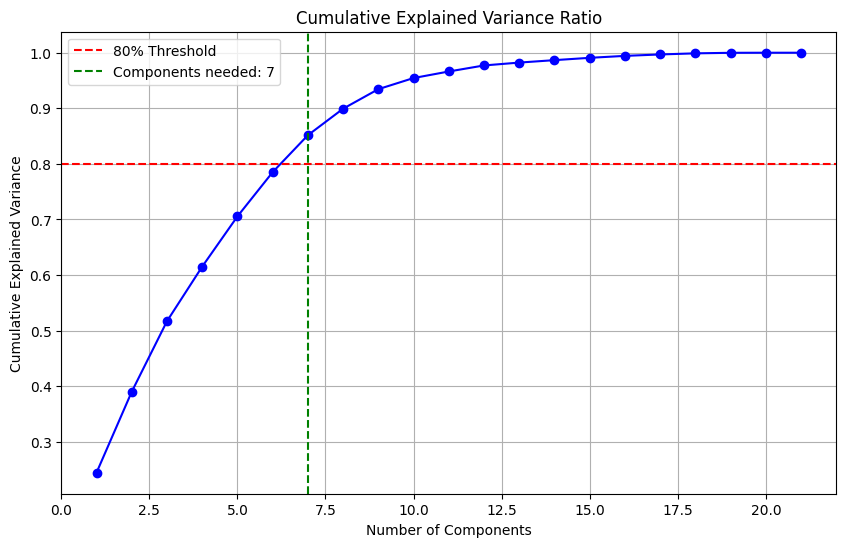


Cumulative explained variance for first 10 components:
Components 1-1: 0.244
Components 1-2: 0.390
Components 1-3: 0.517
Components 1-4: 0.615
Components 1-5: 0.705
Components 1-6: 0.785
Components 1-7: 0.852
Components 1-8: 0.899
Components 1-9: 0.934
Components 1-10: 0.954


In [114]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# Find number of components needed for 80% variance (we can change this)
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1

print(f"Number of components needed to explain 80% of variance: {n_components_80}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1),
         cumulative_variance_ratio,
         'bo-')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.axvline(x=n_components_80, color='g', linestyle='--',
            label=f'Components needed: {n_components_80}')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

print("\nCumulative explained variance for first 10 components:")
for i in range(10):
    print(f"Components 1-{i+1}: {cumulative_variance_ratio[i]:.3f}")

# Hierarchical Clustering on Principal Components (HCPC)

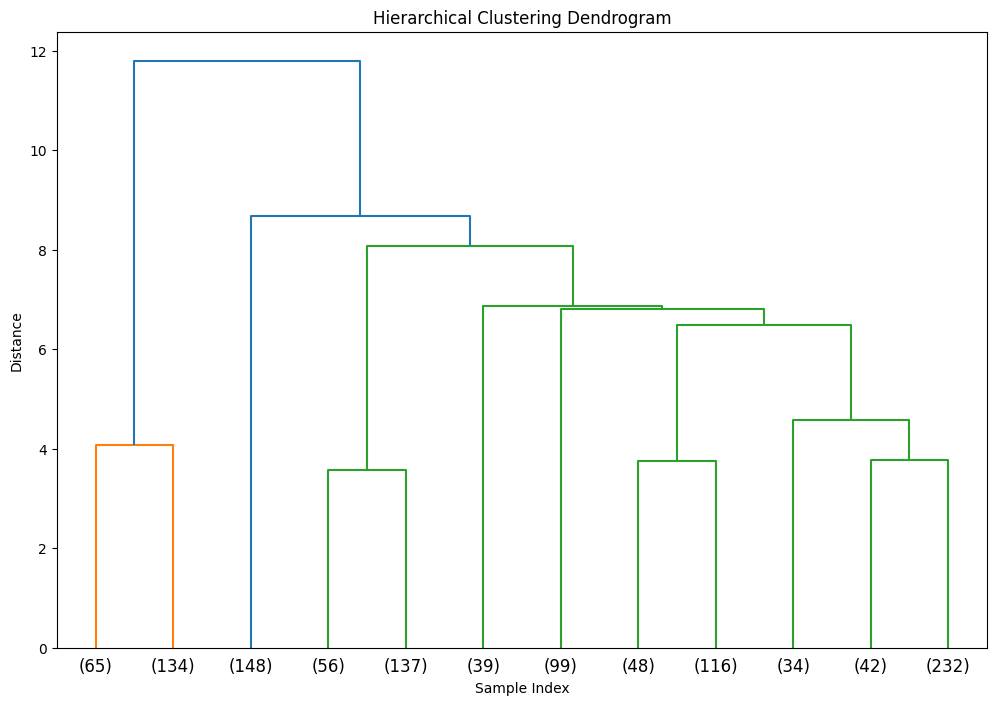

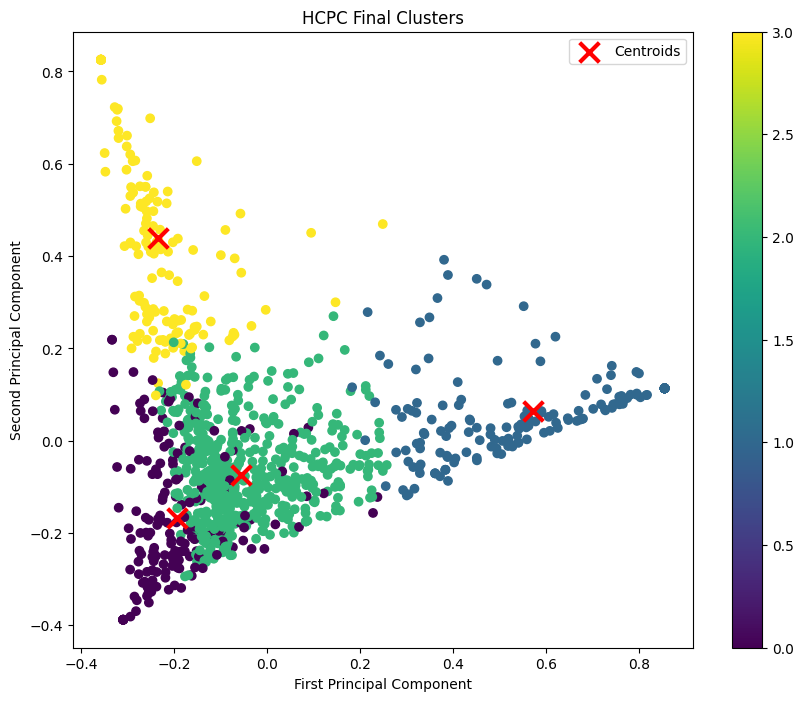

In [116]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 1. Define how many PCs to use
n_components = 7 # I think we should use between 7 and 9 based on the PCA
selected_components = pca_result[:, :n_components]

# 2. Hierarchical clustering uisng Ward
linked = linkage(selected_components, method='ward') # the methods can be different. Ward method is the one we use in Ipsos and seemingly the typical choice in the literature

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 3. Get initial clusters from hierarchical clustering # optional step though, we dont really need them
n_clusters = 4
hc_labels = fcluster(linked, n_clusters, criterion='maxclust')

# 4. K-means to finalize things
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(selected_components)
final_labels = kmeans.labels_


# Visualize final clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=final_labels, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.colorbar(scatter)
plt.title('HCPC Final Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

K-Medoids as an alternative ending

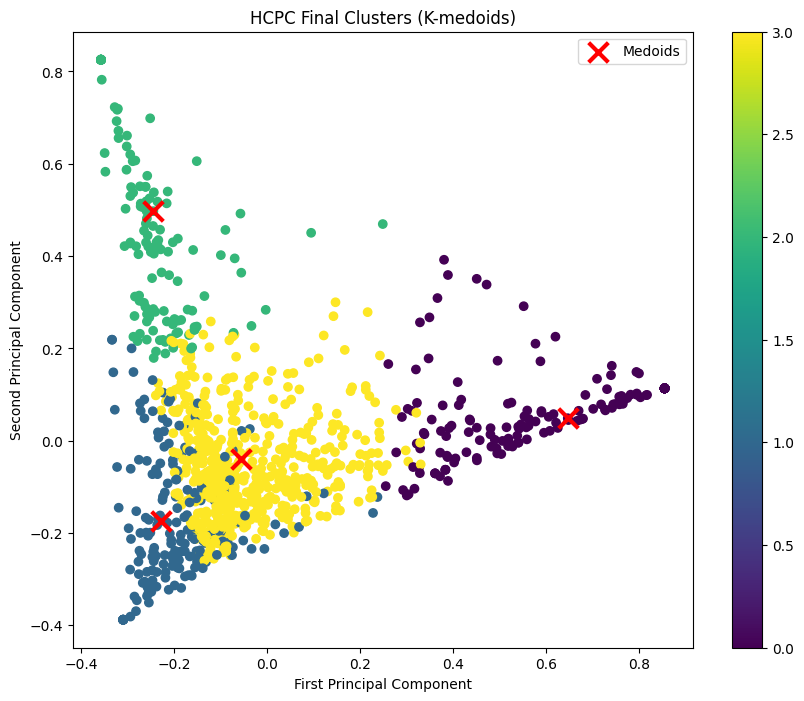

In [117]:
kmedoids = KMedoids(n_clusters=n_clusters,
                    random_state=42,
                    metric='euclidean')
kmedoids.fit(selected_components)
final_labels = kmedoids.labels_

# Visualize final clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=final_labels, cmap='viridis')

# Get medoid locations in PCA space
medoid_indices = kmedoids.medoid_indices_
medoid_locations = pca_result[medoid_indices]

# Plot medoids
plt.scatter(medoid_locations[:, 0], medoid_locations[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Medoids')

plt.colorbar(scatter)
plt.title('HCPC Final Clusters (K-medoids)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

# Get central papers from the HCPC

Kmeans

In [ ]:
centroids_list = []
for i in range(n_clusters):
    distances = np.sum((selected_components - kmeans.cluster_centers_[i])**2, axis=1)
    top_indices = np.argsort(distances)[:10] # N of central papers
    pca_coords = pca_result[top_indices]

    feature_importance = np.dot(pca_coords[:, :7], pca.components_[:7, :])
    feature_importance_df = pd.DataFrame(
        feature_importance,
        columns=features.columns
    )

    # Get top 5 most important features for each paper
    top_features = pd.DataFrame({
        'paper_id': df['id'].iloc[top_indices].values,
        'top_features': [
            ', '.join(feature_importance_df.iloc[j].nlargest(5).index.tolist())
            for j in range(len(feature_importance_df))
        ]
    })
        # Get PCA coordinates for the top papers, here we work with the 8 PCs, we can change it
    cluster_papers = pd.DataFrame({
        'cluster': [i + 1] * 10,
        'rank': range(1, 11),
        'centroid_id': df['id'].iloc[top_indices].values,
        'distance': distances[top_indices],
        'PC1': pca_coords[:, 0],
        'PC2': pca_coords[:, 1],
        'PC3': pca_coords[:, 2],
        'PC4': pca_coords[:, 3],
        'PC5': pca_coords[:, 4],
        'PC6': pca_coords[:, 5],
        'PC7': pca_coords[:, 6],
        'key_features': top_features['top_features']
    })
    centroids_list.append(cluster_papers)

centroids = pd.concat(centroids_list, ignore_index=True)
centerpapers = pd.merge(centroids, metadata, left_on='centroid_id', right_on='id', how='left')
centerpapers.to_csv('means_center_papers_hcpc.csv', index=False)

KMedoids

In [12]:
centroids_list = []
for i in range(n_clusters):
    medoid_point = selected_components[kmedoids.medoid_indices_[i]]
    distances = np.sum((selected_components - medoid_point)**2, axis=1)
    top_indices = np.argsort(distances)[:10]  # N of central papers
    pca_coords = pca_result[top_indices]

    feature_importance = np.dot(pca_coords[:, :8], pca.components_[:8, :])
    feature_importance_df = pd.DataFrame(
        feature_importance,
        columns=features.columns
    )

    # Get top 5 most important features for each paper
    top_features = pd.DataFrame({
        'paper_id': df['id'].iloc[top_indices].values,
        'top_features': [
            ', '.join(feature_importance_df.iloc[j].nlargest(5).index.tolist())
            for j in range(len(feature_importance_df))
        ]
    })
     # Get PCA coordinates for the top papers, here we work with the 8 PCs, we can change it
    cluster_papers = pd.DataFrame({
        'cluster': [i + 1] * 10,
        'rank': range(1, 11),
        'centroid_id': df['id'].iloc[top_indices].values,
        'distance': distances[top_indices],
        'PC1': pca_coords[:, 0],
        'PC2': pca_coords[:, 1],
        'PC3': pca_coords[:, 2],
        'PC4': pca_coords[:, 3],
        'PC5': pca_coords[:, 4],
        'PC6': pca_coords[:, 5],
        'PC7': pca_coords[:, 6],
        'PC8': pca_coords[:, 7],
        'key_features': top_features['top_features']
    })
    centroids_list.append(cluster_papers)

centroids = pd.concat(centroids_list, ignore_index=True)
centerpapers = pd.merge(centroids, metadata, left_on='centroid_id', right_on='id', how='left')
centerpapers.to_csv('medoids_center_papers_hcpc.csv', index=False)

In [13]:
clustered_df = df.copy()
clustered_df['cluster'] = final_labels + 1

clustered_df.to_csv('papers_with_clusters.csv', index=False)

# K-Means vs K-Medoids

Adjusted Rand Index: 0.850
Adjusted Mutual Information: 0.817
Normalized Mutual Information: 0.818

Confusion Matrix (normalized by row):
col_0         0         1         2         3
row_0                                        
0      0.000000  0.937853  0.000000  0.062147
1      0.939891  0.000000  0.000000  0.060109
2      0.000000  0.037500  0.000000  0.962500
3      0.000000  0.006667  0.906667  0.086667
All    0.149565  0.166087  0.118261  0.566087


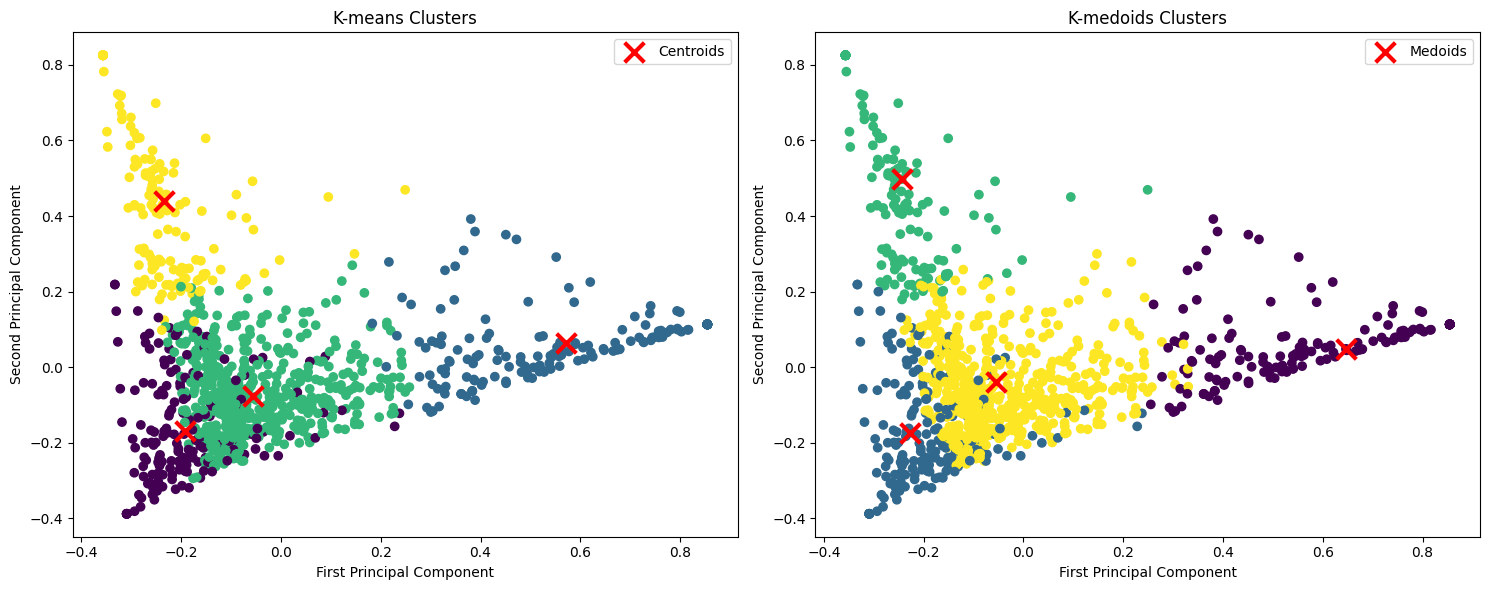

In [126]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, normalized_mutual_info_score
kmeans_labels = kmeans.labels_
kmedoids_labels = kmedoids.labels_

# similarity metrics
ari = adjusted_rand_score(kmeans_labels, kmedoids_labels)
ami = adjusted_mutual_info_score(kmeans_labels, kmedoids_labels)
nmi = normalized_mutual_info_score(kmeans_labels, kmedoids_labels)

print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Adjusted Mutual Information: {ami:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")

confusion_matrix = pd.crosstab(
    kmeans_labels,
    kmedoids_labels,
    margins=True,
    normalize='index'
)
print("\nConfusion Matrix (normalized by row):")
print(confusion_matrix)

# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-means plot
scatter1 = ax1.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
ax1.set_title('K-means Clusters')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.legend()

# K-medoids plot
scatter2 = ax2.scatter(pca_result[:, 0], pca_result[:, 1], c=kmedoids_labels, cmap='viridis')
ax2.scatter(medoid_locations[:, 0], medoid_locations[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Medoids')
ax2.set_title('K-medoids Clusters')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.legend()

plt.tight_layout()
plt.show()

# Somewhat good overlap of K-Means and K-Medoids with 7 PCs and 4 clusters. ARI=0.577; C1 (95.2%), C2 (94.4%), C3 (98.8%), C4 (38%) and (61.4%)

# Very good overlap of K-Means and K-Medoids with 9 PCs and 4 clusters. ARI=0.77; C1 (80.4% overlap), C2(88.5% overlap), C3 (95.6% overlap), C4 (100% overlap)

# Random Forest for a ML approach to "predicting" the clusters we got from the PCA a Cluster Analysis with the just the original (normalized) keywords.



Gives us the same picture as the PCA = Operator, Uncertainty, and Entanglement predict one cluster each, the fourth is predicted by a mix of words. Not sure we get any useful info here. **But the model fits extremely well all clusters from the original data, this is good robustness for the pca and clsuter approach we have.**

Top 20 most important features:
                  feature  importance
11           interference    0.284491
7            entanglement    0.271133
17            uncertainty    0.219867
1                collapse    0.035299
10          hilbert space    0.027719
15          superposition    0.026315
19          wave function    0.025997
9             hamiltonian    0.024483
4           contextuality    0.021143
5              eigenvalue    0.011792
14        dinger equation    0.010991
3         complementarity    0.010566
18  uncertainty principle    0.010348
2           commutativity    0.007418
6             eigenvector    0.004558
12    measurement problem    0.002566
20  wave-particle duality    0.002270
16              tunneling    0.001287
0             born's rule    0.000738
8     exclusion principle    0.000558

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.94      0.96        36
           2       1.00      0.90    

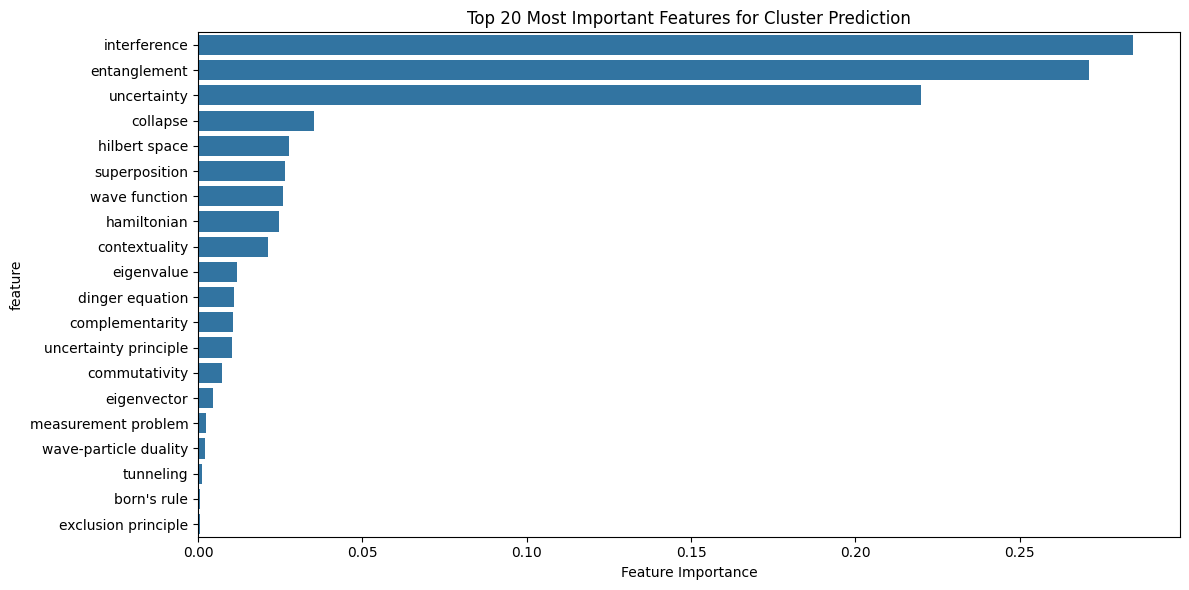

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = features
y = final_labels + 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)


feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 20 most important features
print("Top 20 most important features:")
print(feature_importance.head(20))

# Model performance
y_pred = rf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# viz
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Most Important Features for Cluster Prediction')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


=== ANALYSIS FOR CLUSTER 1 ===

Top 10 most important features for Cluster 1:
            feature  importance
7      entanglement    0.734548
17      uncertainty    0.049955
11     interference    0.048842
10    hilbert space    0.023669
9       hamiltonian    0.022593
1          collapse    0.022419
15    superposition    0.021192
19    wave function    0.021061
4     contextuality    0.015594
14  dinger equation    0.010649

Classification Report for Cluster 1:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       194
           1       0.97      0.89      0.93        36

    accuracy                           0.98       230
   macro avg       0.97      0.94      0.96       230
weighted avg       0.98      0.98      0.98       230



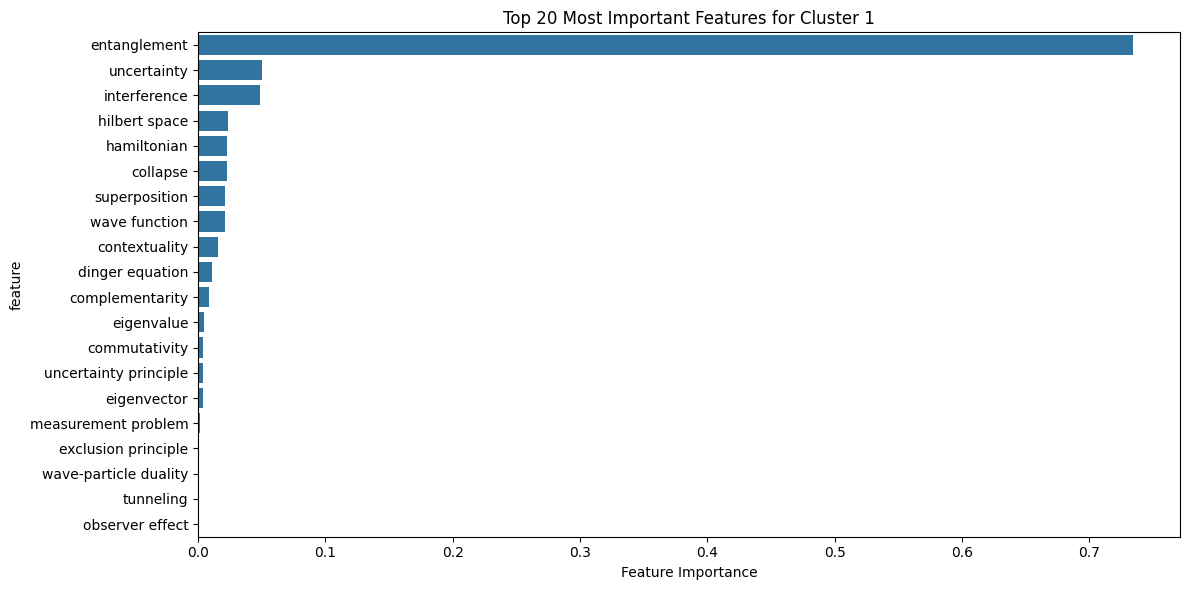


=== ANALYSIS FOR CLUSTER 2 ===

Top 10 most important features for Cluster 2:
          feature  importance
11   interference    0.706635
7    entanglement    0.058422
17    uncertainty    0.035436
15  superposition    0.032331
1        collapse    0.029068
10  hilbert space    0.025544
19  wave function    0.022060
4   contextuality    0.016060
9     hamiltonian    0.015472
5      eigenvalue    0.010189

Classification Report for Cluster 2:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       200
           1       0.96      0.90      0.93        30

    accuracy                           0.98       230
   macro avg       0.97      0.95      0.96       230
weighted avg       0.98      0.98      0.98       230



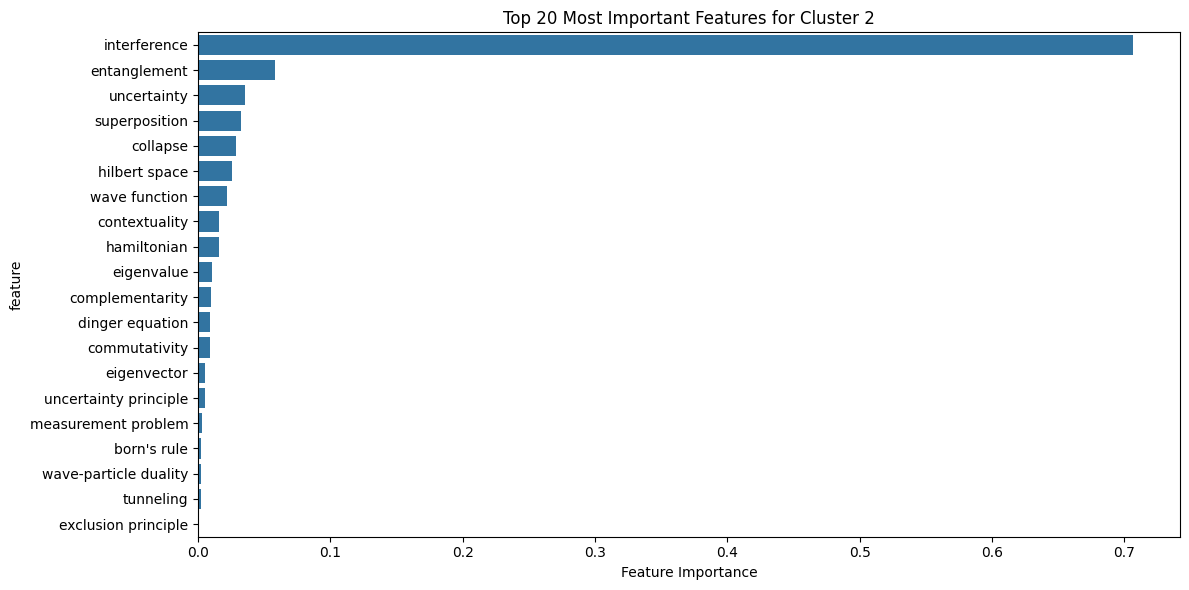


=== ANALYSIS FOR CLUSTER 3 ===

Top 10 most important features for Cluster 3:
                  feature  importance
17            uncertainty    0.733200
11           interference    0.047656
7            entanglement    0.042357
18  uncertainty principle    0.040317
15          superposition    0.023489
10          hilbert space    0.017847
1                collapse    0.016904
9             hamiltonian    0.013311
19          wave function    0.012256
4           contextuality    0.012235

Classification Report for Cluster 3:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       207
           1       1.00      0.91      0.95        23

    accuracy                           0.99       230
   macro avg       1.00      0.96      0.97       230
weighted avg       0.99      0.99      0.99       230



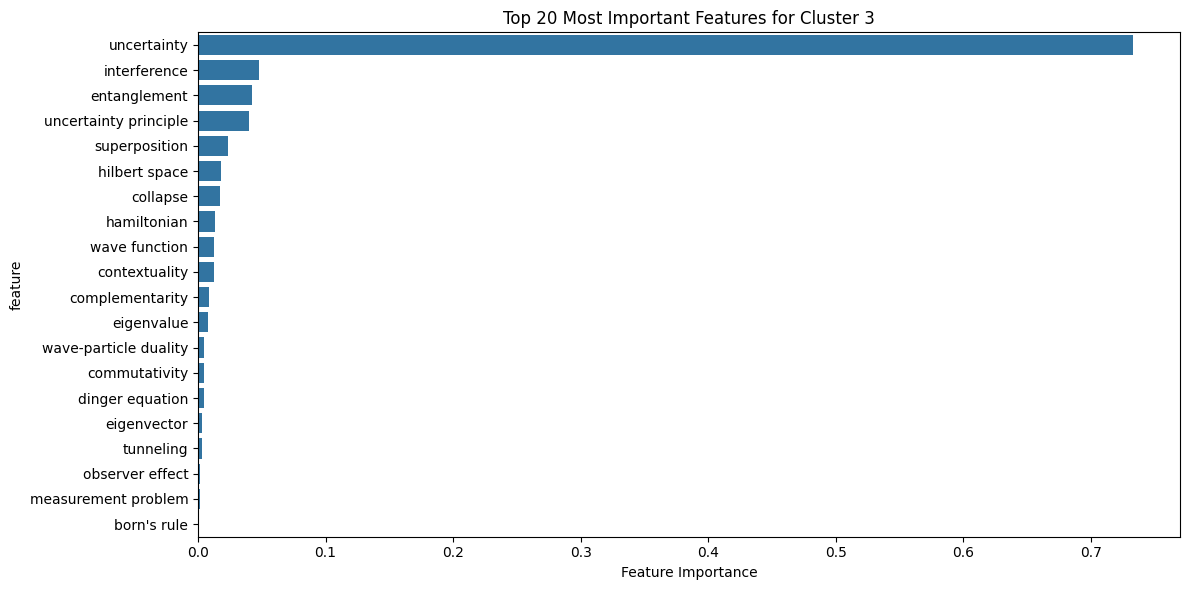


=== ANALYSIS FOR CLUSTER 4 ===

Top 10 most important features for Cluster 4:
          feature  importance
11   interference    0.251820
7    entanglement    0.224641
17    uncertainty    0.195974
1        collapse    0.056365
9     hamiltonian    0.039455
19  wave function    0.039017
10  hilbert space    0.038150
15  superposition    0.033903
4   contextuality    0.032245
5      eigenvalue    0.019042

Classification Report for Cluster 4:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        89
           1       0.96      1.00      0.98       141

    accuracy                           0.97       230
   macro avg       0.98      0.97      0.97       230
weighted avg       0.97      0.97      0.97       230



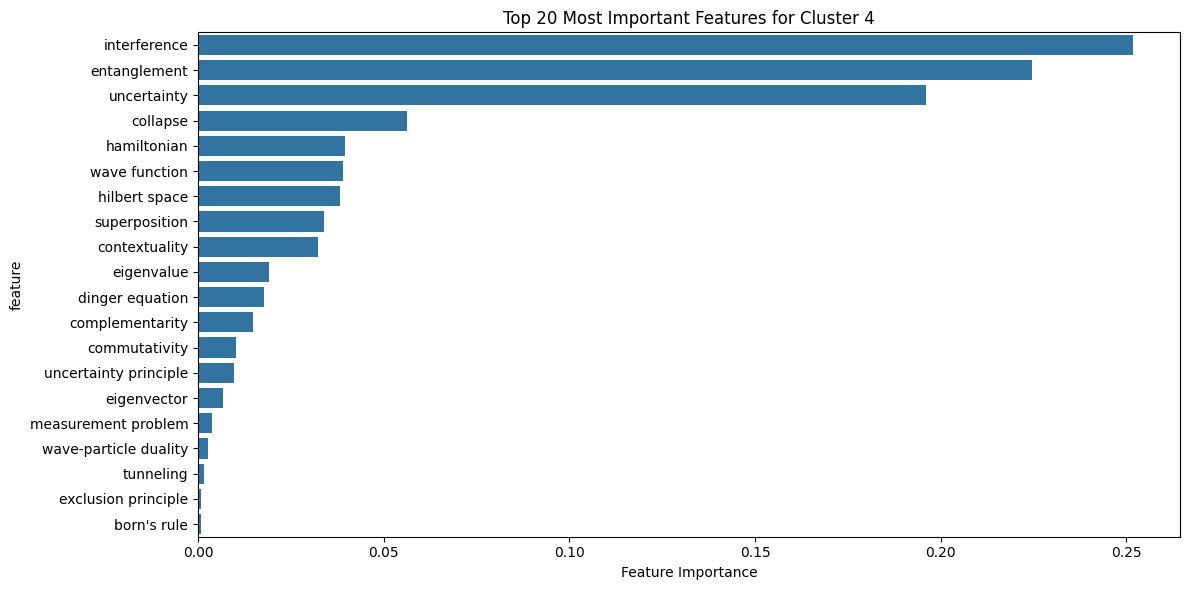

In [128]:
for cluster_num in range(1, 5):
    print(f"\n=== ANALYSIS FOR CLUSTER {cluster_num} ===")

    binary_labels = (final_labels + 1 == cluster_num).astype(int)
    X_train, X_test, y_train, y_test = train_test_split(
        features, binary_labels, test_size=0.2, random_state=42
    )
    rf = RandomForestClassifier(n_estimators=1000, random_state=42)
    rf.fit(X_train, y_train)


    feature_importance = pd.DataFrame({
        'feature': features.columns,
        'importance': rf.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    ################################################

    # top 10 features for this cluster
    print(f"\nTop 10 most important features for Cluster {cluster_num}:")
    print(feature_importance.head(10))

    # Model performance
    y_pred = rf.predict(X_test)
    print(f"\nClassification Report for Cluster {cluster_num}:")
    print(classification_report(y_test, y_pred))

    # viz
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title(f'Top 20 Most Important Features for Cluster {cluster_num}')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()